In [1]:
import numpy as np
from HuffmanMatching.utils import GaussHermiteModulation, RandomWalkModulation, DiscretisedGaussianModulation
from shaping_analysis import generate_shaping_results, plot_distributions, plot_kl_vs_constellation_size, plot_single_distribution, plot_v_dist_constellation_size, plot_kl_vs_constellation_size_two_distributions, plot_v_dist_two_distributions
import matplotlib.pyplot as plt

In [2]:
def set_plot_style_one_column():
    cm_to_inch = 1 / 2.54
    fig_width = 16 * cm_to_inch  
    fig_height = 10 * cm_to_inch   

    plt.rcParams.update({
        'figure.figsize': (fig_width, fig_height),
        'font.size': 8,               # tamanho base da fonte
        'axes.labelsize': 9,          # rótulos dos eixos
        'axes.titlesize': 9,          # título
        'legend.fontsize': 8,         # legenda
        'xtick.labelsize': 8,
        'ytick.labelsize': 8
    })

set_plot_style_one_column()

In [3]:
# parameters
variance = 1
start = 4
stop = 32
step = 2

In [4]:
print(list(range(start, stop+1, step)))

[4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]


#### Gauss Hermite Distribution

In [5]:
gausshermite_results = generate_shaping_results(start, stop, step, variance, GaussHermiteModulation)

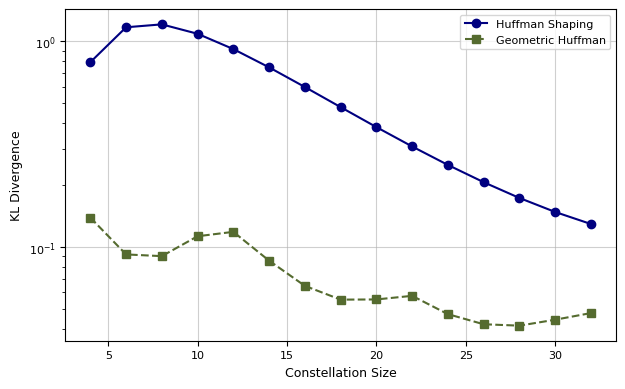

In [6]:
plot_kl_vs_constellation_size(gausshermite_results, f"Gauss-Hermite Distribution")

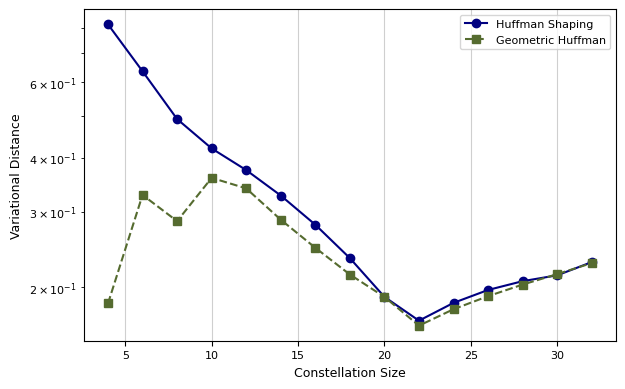

In [7]:
plot_v_dist_constellation_size(gausshermite_results, f"Gauss-Hermite Distribution")

In [8]:
#plot_distributions(gausshermite_results, "PAM (Gauss-Hermite)")

#### Binomial Distribution

In [9]:
binomial_results = generate_shaping_results(start, stop, step, variance, RandomWalkModulation)

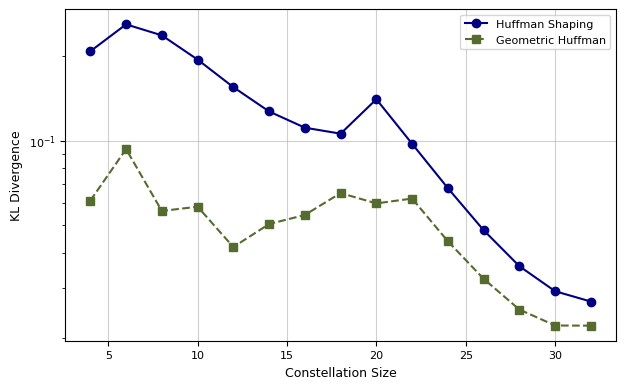

In [10]:
plot_kl_vs_constellation_size(binomial_results, f"Binomial Distribution")

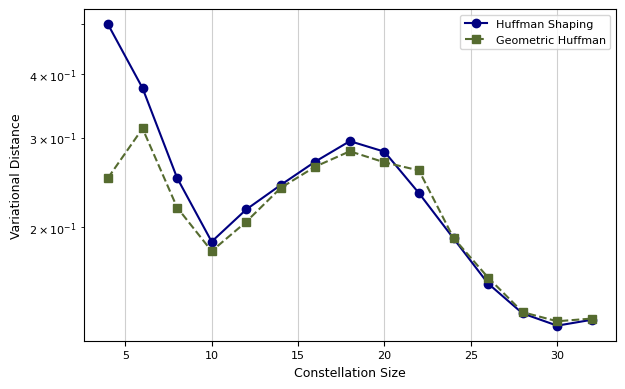

In [11]:
plot_v_dist_constellation_size(binomial_results, f"Binomial Distribution")

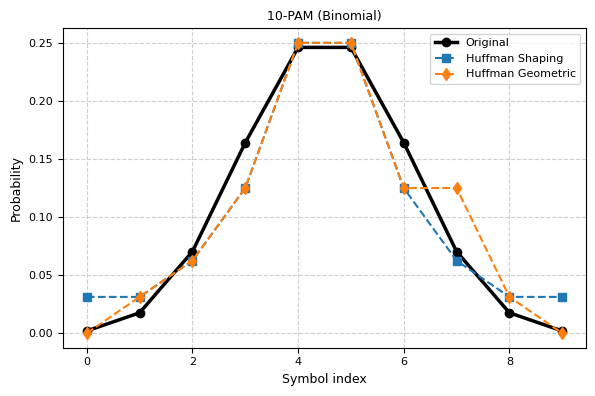

Huffman Distribution = [0.03125 0.03125 0.0625  0.125   0.25    0.25    0.125   0.0625  0.03125
 0.03125]
Huffman Geometric Distribution = [0.      0.03125 0.0625  0.125   0.25    0.25    0.125   0.125   0.03125
 0.     ]


In [12]:
idx = 3
plot_single_distribution(binomial_results, idx, f"PAM (Binomial)")
print(f"Huffman Distribution = {np.array(binomial_results.huffman_shaping[idx])}")
print(f"Huffman Geometric Distribution = {np.array(binomial_results.geometric_huffman[idx])}")

In [13]:
np.log2(1/np.array(binomial_results.geometric_huffman[3]))

/tmp/ipykernel_18315/1418942379.py:1: RuntimeWarning: divide by zero encountered in divide
  np.log2(1/np.array(binomial_results.geometric_huffman[3]))


array([inf,  5.,  4.,  3.,  2.,  2.,  3.,  3.,  5., inf])

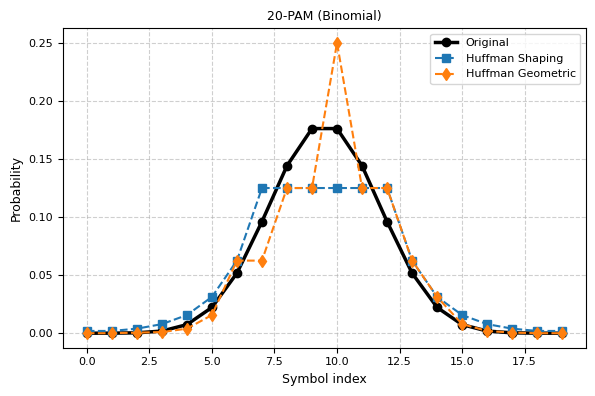

Huffman Distribution = [0.00195312 0.00195312 0.00390625 0.0078125  0.015625   0.03125
 0.0625     0.125      0.125      0.125      0.125      0.125
 0.125      0.0625     0.03125    0.015625   0.0078125  0.00390625
 0.00195312 0.00195312]
Huffman Geometric Distribution = [0, 0, 0.00048828125, 0.0009765625, 0.00390625, 0.015625, 0.0625, 0.0625, 0.125, 0.125, 0.25, 0.125, 0.125, 0.0625, 0.03125, 0.0078125, 0.001953125, 0.00048828125, 0, 0]


In [14]:
idx = 8
plot_single_distribution(binomial_results, idx, f"PAM (Binomial)")
print(f"Huffman Distribution = {binomial_results.huffman_shaping[idx]}")
print(f"Huffman Geometric Distribution = {binomial_results.geometric_huffman[idx]}")

In [15]:
#plot_distributions(binomial_results, "PAM (Binomial)")

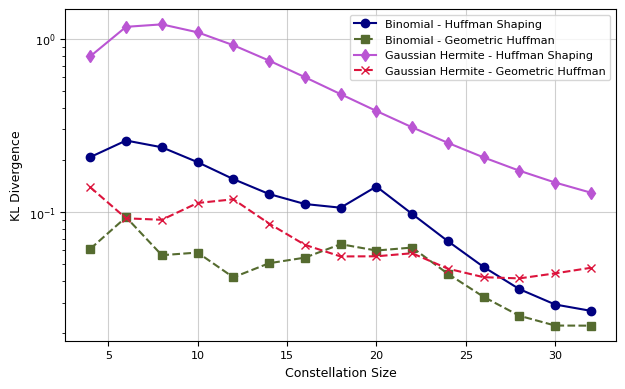

In [16]:
plot_kl_vs_constellation_size_two_distributions(binomial_results, gausshermite_results)

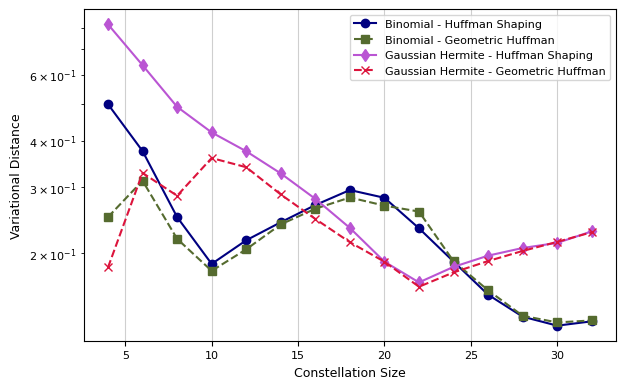

In [17]:
plot_v_dist_two_distributions(binomial_results, gausshermite_results)

#### Gaussian Distribution